In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.io import fits

In [ ]:
imgData = bytes()
imgData = imgData.rstrip(b'\0')

## Dev

In [5]:
def DF_tmp_data(file_name):
    
    '''
    Read the tmp data file and return a DataFrame containing the header information.
    Input:
        file_name: str
            The name of the tmp data file.
    Output:
        dataDF: DataFrame
            The DataFrame containing the header information.
    '''
    
    with open(file_name, 'rb') as f:
        mpduPackets = f.read().split(b'\x1A\xCF\xFC\x1D')[1:]

    headers = [[], [], []]
    for k, packet in enumerate(mpduPackets):
        # classify the packets by the VCDU header
        if packet[:2] == b'\x55\x40':
            headers[0].append('IM')
            headers[2].append(packet[5:])
        elif packet[:2] == b'\x40\x3F':
            headers[0].append('HK')
            headers[2].append(packet[5:])
        else:
            continue
        
        headers[1].append(int.from_bytes(packet[2:5], 'big'))
        
    headerDF = pd.DataFrame({
        'VCDU': headers[0],
        'PSC': pd.Series(headers[1], dtype=int),
        'data': pd.Series(headers[2], dtype='object')  # Preserve binary data
    })
    
    return headerDF

In [8]:
files = glob.glob('./optical/opt_frame_*.bin')
file_name = files[1]

data = DF_tmp_data(file_name)

In [9]:
IM = list(data[data['VCDU'] == 'IM']['data'].values)

In [20]:
IM_data = b''
for i in range(len(IM)):
    IM_data+=IM[i]

In [27]:
IM_data = IM_data.rstrip(b'\0')

In [28]:

IM_data = np.frombuffer(IM_data, dtype=np.uint16).reshape(3003, 3008)

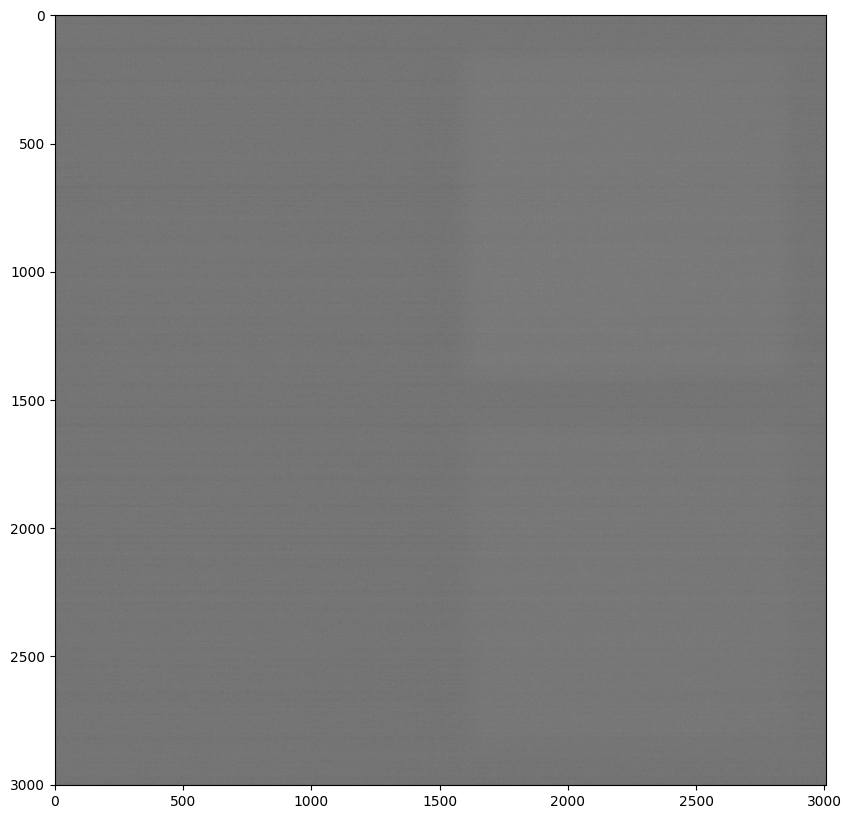

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(IM_data, cmap='gray')

In [ ]:
files = glob.glob('./tmp/*.bin')

In [7]:
files = glob.glob('./optical/opt_frame_*.bin')
# files.sort(key=lambda x:int(x.split('/')[-1].split('_')[2].split('_')[0]))

for file in files:
    # print(file)
    data = np.fromfile(file, dtype=np.uint16)
    filename = file.split('/')[-1].split('.')[0].split('_')[-1]
    try:
        image_array = data.reshape(3003,3008)
    except ValueError:
        print(f"{filename} data shape is not correct")
    # plt.ion()
    # plt.imshow(image_array,)
    # plt.colorbar()
    # plt.show()
    # input()
    hdu = fits.PrimaryHDU(image_array)
    hdu.writeto(f'./measurement/{filename}.fits',overwrite=True)
    # file_name = input("input file name or enter empty to exit\n")
    # if file_name != "":
    #     hdu.writeto(f'./measurement/{file_name}.fits',overwrite=True)
    #     plt.savefig(f'./measurement/{file_name}.png')

F20250109130351 data shape is not correct
F20250107202558 data shape is not correct
F20250107204737 data shape is not correct
F20250109154843 data shape is not correct
F20250109125426 data shape is not correct
F20250107194450 data shape is not correct
F20250109202544 data shape is not correct


In [8]:
files = glob.glob('./optical/opt_frame_*.bin')
# files[0].split('/')[-1].split('.')[0].split('_')[-1]
data = np.fromfile(files[0], dtype=np.uint16)

In [9]:
data

array([1025, 1025, 1026, ..., 1026, 1027, 1025], dtype=uint16)

## origin

./optical/opt_frame_0_08_111533.bin


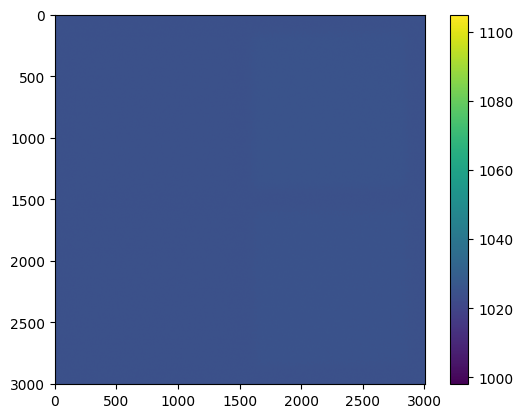

<Figure size 640x480 with 0 Axes>

In [10]:
# files = glob.glob('C:/Users/verte/Documents/TVT_15_08_2024/optical/opt_frame_*.bin')
# files.sort(key=)
# print(files[-1])
# file = files[-1]
# file = 'C:/Users/verte/Documents/TVT_15_08_2024/optical/opt_frame_13_22_164027.bin'

files = glob.glob('./optical/opt_frame_*.bin')
files.sort(key=lambda x:int(x.split('/')[-1].split('_')[2].split('_')[0]))
# print(files[0].split('/')[-1])
file = files[-5]
# file = "C:/Users/verte/Documents/TVT_15_08_2024/optical/20241011132505.bin"
print(file)
data = np.fromfile(file,dtype=np.uint16)
image_array = data.reshape(3003,3008)
plt.ion()
plt.imshow(image_array,)
plt.colorbar()
plt.show()
# input()
hdu = fits.PrimaryHDU(image_array)
file_name = input("input file name or enter empty to exit\n")
if file_name != "":
    hdu.writeto(f'./measurement/{file_name}.fits',overwrite=True)
    plt.savefig(f'./measurement/{file_name}.png')